# Laboratory #06 : Image Classification using CNN

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Use will have to mount your drive if you need to access images.

---

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

In [22]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [23]:
def plotImages(images, grid=(2, 2), figsize=(15, 9), **kwargs):
    f, ax = plt.subplots(grid[0], grid[1], figsize=figsize)
    for imageIdx, (title, image) in enumerate(images.items()):
        if grid[0] == 1:
            ax[imageIdx].set_title(title)
            ax[imageIdx].imshow(image, **kwargs)
            ax[imageIdx].axis('off')
        else:
            ax[imageIdx//grid[0]][imageIdx%grid[1]].set_title(title)
            ax[imageIdx//grid[0]][imageIdx%grid[1]].imshow(image, **kwargs)
            ax[imageIdx//grid[0]][imageIdx%grid[1]].axis('off')
    return f, ax

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [24]:
# solution
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)

(50000, 32, 32, 3)


In [25]:
random_images = {}
for label in np.unique(y_train):
    mask = (y_train == label).flatten()
    x_class = x_train[mask]
    class_images = x_class[np.random.choice(x_class.shape[0], 10, replace=False), :]
    for i, image in enumerate(class_images):
        random_images[f"{label}_{i}"] = image

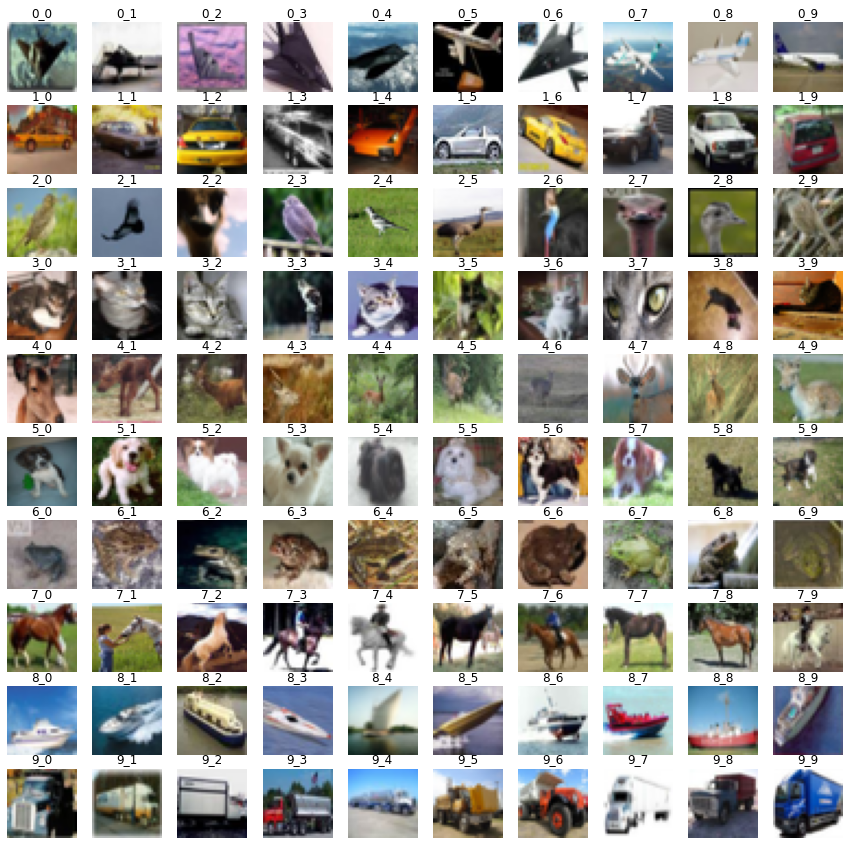

In [26]:
plotImages(random_images, grid=(10,10), figsize=(15,15))
plt.show()

In [27]:
from keras.utils import to_categorical

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [28]:
# solution
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               720100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
_________________________________________________________________


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.

In [30]:
# solution
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [31]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 1.9511 - accuracy: 0.2994
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 1.7127 - accuracy: 0.3979
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 1.5831 - accuracy: 0.4456
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 1.4843 - accuracy: 0.4782
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 1.4054 - accuracy: 0.5042
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 1.3466 - accuracy: 0.5246
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 1.3011 - accuracy: 0.5419
Epoch 8/10
500/500 [==============================] - 2s 3ms/step - loss: 1.2616 - accuracy: 0.5571
Epoch 9/10
500/500 [==============================] - 2s 3ms/step - loss: 1.2296 - accuracy: 0.5701
Epoch 10/10
500/500 [==============================] - 2s 3ms/step - loss: 1.1988 - accuracy: 0.5813

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 100 epochs with a batch size of 32. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3 followed by max pooling layer. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [32]:
from keras.backend import clear_session
clear_session()

In [33]:
# solution
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.

In [34]:
# solution
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

In [35]:
# solution
history = model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
500/500 [==============================] - 2s 5ms/step - loss: 1.8878 - accuracy: 0.3258
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 1.5530 - accuracy: 0.4487
Epoch 3/10
500/500 [==============================] - 2s 5ms/step - loss: 1.3975 - accuracy: 0.5040
Epoch 4/10
500/500 [==============================] - 2s 5ms/step - loss: 1.3016 - accuracy: 0.5403
Epoch 5/10
500/500 [==============================] - 2s 5ms/step - loss: 1.2303 - accuracy: 0.5675
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 1.1675 - accuracy: 0.5895
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 1.1127 - accuracy: 0.6092
Epoch 8/10
500/500 [==============================] - 2s 5ms/step - loss: 1.0626 - accuracy: 0.6274
Epoch 9/10
500/500 [==============================] - 2s 5ms/step - loss: 1.0194 - accuracy: 0.6450
Epoch 10/10
500/500 [==============================] - 2s 5ms/step - loss: 0.9764 - accuracy: 0.6593

**Solution**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [36]:
# solution
predictions = model.predict(x_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

(10000, 10)


In [38]:
from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

array([[726,  25,  47,  49,  37,  11,  11,  18,  49,  27],
       [ 41, 700,  12,  26,  13,  15,  17,  20,  39, 117],
       [ 75,   2, 395, 103, 180, 111,  61,  57,  10,   6],
       [ 12,   5,  41, 491, 142, 207,  50,  33,   9,  10],
       [ 24,   2,  63,  85, 654,  48,  48,  68,   5,   3],
       [  8,   1,  35, 195,  91, 582,  19,  63,   4,   2],
       [  5,   5,  35, 108, 115,  48, 663,  16,   3,   2],
       [ 14,   4,  24,  52,  81,  81,  13, 718,   2,  11],
       [134,  51,  14,  39,  27,  17,   7,  12, 661,  38],
       [ 52, 107,  10,  48,  16,  28,  18,  58,  34, 629]])

**Solution**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [40]:
# solution
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.0979 - accuracy: 0.6219
Test accuracy: 0.6219000220298767


## Define the complete VGG architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 64 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

In [42]:
# solution
clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [43]:
# solution
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [44]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7032 - accuracy: 0.3868
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2958 - accuracy: 0.5368
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1041 - accuracy: 0.6113
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9632 - accuracy: 0.6621
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8458 - accuracy: 0.7036
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7538 - accuracy: 0.7371
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6728 - accuracy: 0.7634
Epoch 8/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5989 - accuracy: 0.7921
Epoch 9/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5306 - accuracy: 0.8148
Epoch 10/100
1563/1563 [==============================] - 7s 5ms/step - l

In [45]:
predictions = np.argmax(model.predict(x_test), axis=1)
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

array([[815,  15,  40,  16,  18,   7,   8,   8,  46,  27],
       [ 13, 861,   7,  11,   1,   5,   7,   2,  20,  73],
       [ 54,   3, 663,  49,  77,  49,  48,  28,  16,  13],
       [ 18,   5,  68, 549,  71, 155,  67,  27,  16,  24],
       [ 22,   4,  66,  54, 699,  37,  48,  63,   4,   3],
       [  9,   5,  48, 163,  47, 653,  22,  43,   3,   7],
       [  8,   4,  29,  63,  31,  19, 829,   1,   8,   8],
       [ 10,   2,  25,  41,  54,  54,   5, 792,   5,  12],
       [ 49,  25,  14,   9,   6,  10,   8,   2, 858,  19],
       [ 32,  69,   7,  18,   5,   3,  11,  14,  22, 819]])

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**

*(Double-click or enter to edit)*

...


---

## **End of P6: Image Classification using CNN**
Deadline for P6 submission in CampusVirtual is: **Thursday, the 19th of November, 2020**